## California Housing Data

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor


**Get the data. Make a copy.**

In [2]:
housing_data = pd.read_csv("housing.csv")
data = housing_data.copy()

**Split the data into test and training sets.**<br/> We also considered splitting the data into training and test sets after the "preprocessing" stage, since our "preprocessing" stage involves dropping observations based on certain conditions. We came to the conclusion that postponing splitting the data would be more efficient. <br/>This is still in consideration.....

In [3]:
#data_train, data_test = train_test_split(data, test_size=0.20, random_state=11)
data_train = data
# Remember to change this, or else change the variables up to the split as 'data' and not 'data_train'
data_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## Getting a grasp on our data

In [4]:
data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


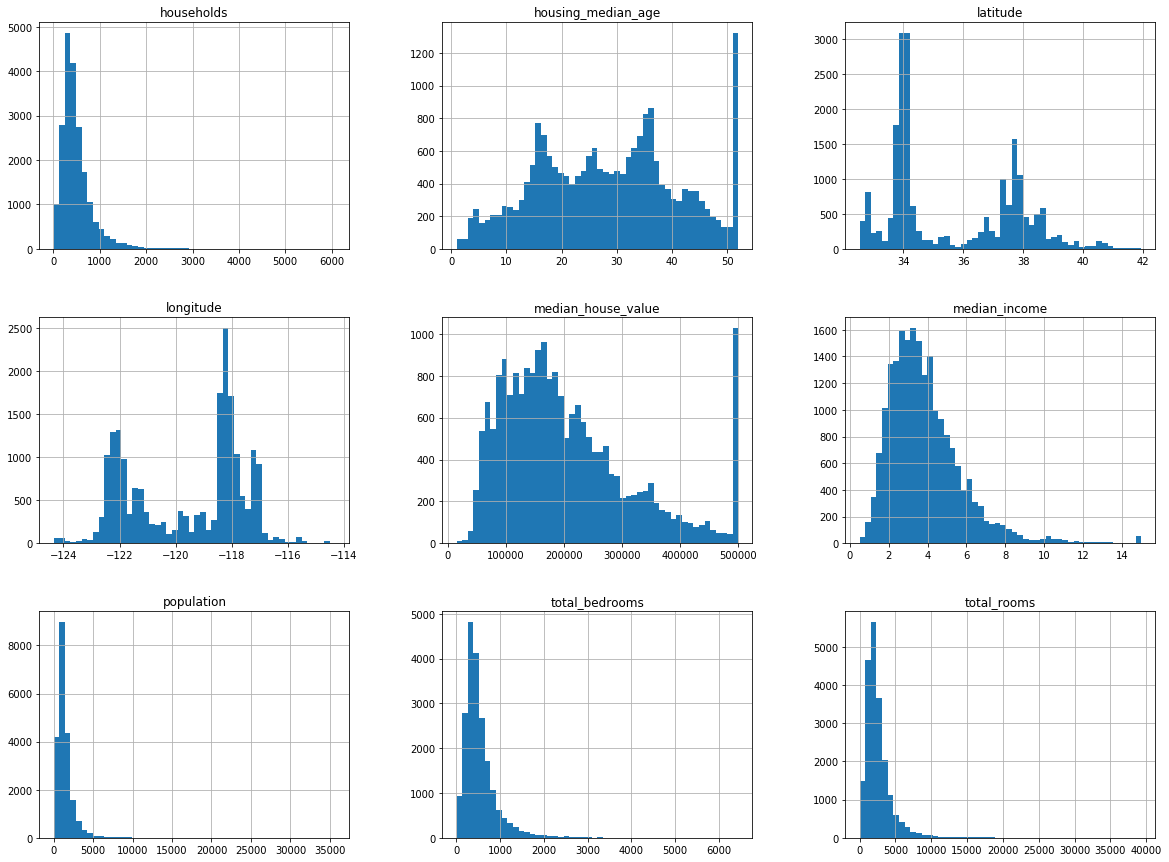

In [5]:
data_train.hist(bins=50,figsize=(20,15))
plt.show()

<br/>**Visualizing high-density areas**<br/>

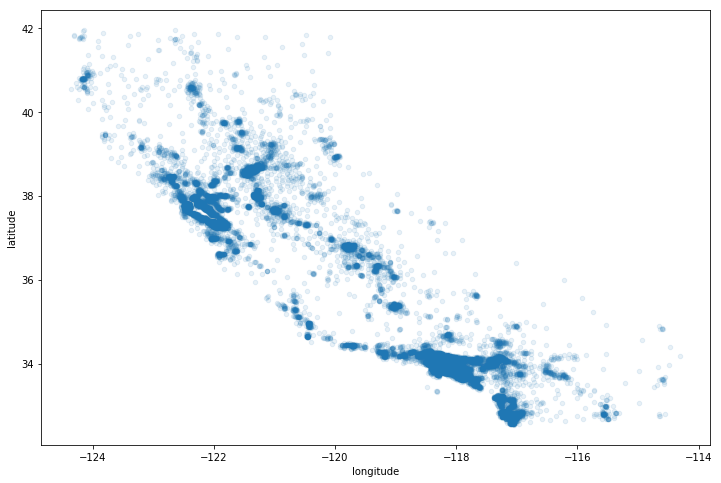

In [6]:
data_train.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,figsize=(12,8));

**Looking for correlations**

In [7]:
corr_matrix = data_train.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [8]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## Cleaning the data##
<br/> Deal with NaN or missing values. <br/> Deal with categorical data.

Do we have any missing values?

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Mariano had a look at the csv data and searched for empty values. We were able to confirm that there are 207 empty values (in the given data set) for total_bedrooms. Let's get rid of these!

In [10]:
data_train = data_train.dropna(axis=0,how='any')

We also have capped values for the median_house_value which can improperly influence our experiment/model/results. Since we cannot reconstruct these missing labels, we opted to drop them from the training data. This is also the case for capped values of housing_median_age.

In [11]:
data_train['median_house_value'].max()

500001.0

In [12]:
data_train = data_train.drop(data_train[(data_train['median_house_value'] > 500000) == True].index)

In [13]:
data_train['housing_median_age'].max()

52.0

In [14]:
data_train = data_train.drop(data_train[(data_train['housing_median_age'] > 51) == True].index)

In [15]:
data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY


** One hot encoding for the ocean_proximity feature**<br/>

In [16]:
data_train['ocean_proximity'].value_counts()

<1H OCEAN     8235
INLAND        6290
NEAR OCEAN    2303
NEAR BAY      1549
ISLAND           2
Name: ocean_proximity, dtype: int64

In [17]:
housing_cat = data_train['ocean_proximity']
housing_cat_encoded,housing_categories = housing_cat.factorize()

In [18]:
housing_categories

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

In [19]:
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [20]:
housing_cat_1hot = housing_cat_1hot.toarray()

In [21]:
data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY


## Feature Scaling ##

<br/> We opted for standardization as opposed to normalization. <br/> Does it make sense to scale the labels (median_house_value)??

In [22]:
# Try not scaling the target/output/labels

data_labels = pd.DataFrame(data_train['median_house_value'])
data_no_labels = data_train.drop(['median_house_value'],axis=1)
data_no_labels.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,NEAR BAY
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,NEAR BAY
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,NEAR BAY


In [23]:
data_labels.head()

,median_house_value
0,452600.0
1,358500.0
8,226700.0
15,140000.0
18,158700.0


In [24]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_no_labels.iloc[:,:-1])
data_scaled

array([[-1.38592574,  1.06427952,  1.22722929, ..., -0.98630228,
        -0.98221855,  2.95069057],
       [-1.38087691,  1.05496892, -0.5221345 , ...,  0.80003719,
         1.61571931,  2.93552779],
       [-1.40107221,  1.04565832,  1.31469748, ..., -0.22674284,
         0.22176648, -1.02781855],
       ...,
       [-0.87599439,  1.78585104, -0.87200726, ..., -0.39772963,
        -0.19410895, -1.27016817],
       [-0.92648264,  1.78585104, -0.78453907, ..., -0.62628485,
        -0.40974806, -1.16364646],
       [-0.88609204,  1.75791924, -0.95947545, ..., -0.07122218,
         0.05490288, -0.83146695]])

In [25]:
df_scaled = pd.DataFrame(data_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7
0,-1.385926,1.064280,1.227229,-0.803321,-0.975745,-0.986302,-0.982219,2.950691
1,-1.380877,1.054969,-0.522135,1.988285,1.299419,0.800037,1.615719,2.935528
2,-1.401072,1.045658,1.314697,-0.051441,0.272451,-0.226743,0.221766,-1.027819
3,-1.401072,1.050314,2.014443,-0.695589,-0.617121,-0.664091,-0.627954,-0.999404
4,-1.401072,1.045658,2.014443,-0.193288,-0.216581,-0.412337,-0.230049,-1.084711


In [26]:
df_labels = pd.DataFrame(data_labels)
df_labels = df_labels.reset_index(drop=True)
df_labels.head()

,median_house_value
0,452600.0
1,358500.0
2,226700.0
3,140000.0
4,158700.0


## Putting the pieces together##
<br/> Create a dataframe with the scaled values. <br/> Add the encoded 5 rows to said dataframe. <br/> Check it out roughly to see if it makes sense.

In [27]:


#data_scaled.columns = (data.iloc[:,:-5]).columns.....why is this giving me an error?!?!

In [28]:
ocean_proximity_cat_1hot = pd.DataFrame(housing_cat_1hot)

In [29]:
ocean_proximity_cat_1hot = ocean_proximity_cat_1hot.rename(columns=
                            {0: 'NEAR BAY', 1: '<1H OCEAN', 2:'INLAND', 3:'NEAR OCEAN', 4:'ISLAND'})

In [30]:
df_scaled = pd.concat([df_scaled, ocean_proximity_cat_1hot], axis=1, sort=False)

In [31]:
df_scaled.head()

,0,1,2,3,4,5,6,7,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-1.385926,1.064280,1.227229,-0.803321,-0.975745,-0.986302,-0.982219,2.950691,1.0,0.0,0.0,0.0,0.0
1,-1.380877,1.054969,-0.522135,1.988285,1.299419,0.800037,1.615719,2.935528,1.0,0.0,0.0,0.0,0.0
2,-1.401072,1.045658,1.314697,-0.051441,0.272451,-0.226743,0.221766,-1.027819,1.0,0.0,0.0,0.0,0.0
3,-1.401072,1.050314,2.014443,-0.695589,-0.617121,-0.664091,-0.627954,-0.999404,1.0,0.0,0.0,0.0,0.0
4,-1.401072,1.045658,2.014443,-0.193288,-0.216581,-0.412337,-0.230049,-1.084711,1.0,0.0,0.0,0.0,0.0


In [32]:
# Add back in the labels.....

df_scaled = pd.concat([df_scaled,df_labels],axis=1,sort=False)
df_scaled.head()

,0,1,2,3,4,5,6,7,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,median_house_value
0,-1.385926,1.064280,1.227229,-0.803321,-0.975745,-0.986302,-0.982219,2.950691,1.0,0.0,0.0,0.0,0.0,452600.0
1,-1.380877,1.054969,-0.522135,1.988285,1.299419,0.800037,1.615719,2.935528,1.0,0.0,0.0,0.0,0.0,358500.0
2,-1.401072,1.045658,1.314697,-0.051441,0.272451,-0.226743,0.221766,-1.027819,1.0,0.0,0.0,0.0,0.0,226700.0
3,-1.401072,1.050314,2.014443,-0.695589,-0.617121,-0.664091,-0.627954,-0.999404,1.0,0.0,0.0,0.0,0.0,140000.0
4,-1.401072,1.045658,2.014443,-0.193288,-0.216581,-0.412337,-0.230049,-1.084711,1.0,0.0,0.0,0.0,0.0,158700.0


In [33]:
df_scaled.rename(columns={0: 'longitude', 1:'latitude',2:'housing_median_age',3:'total_rooms',
                          4:'total_bedrooms',5:'population',6:'households',7:'median_income'}, inplace=True)



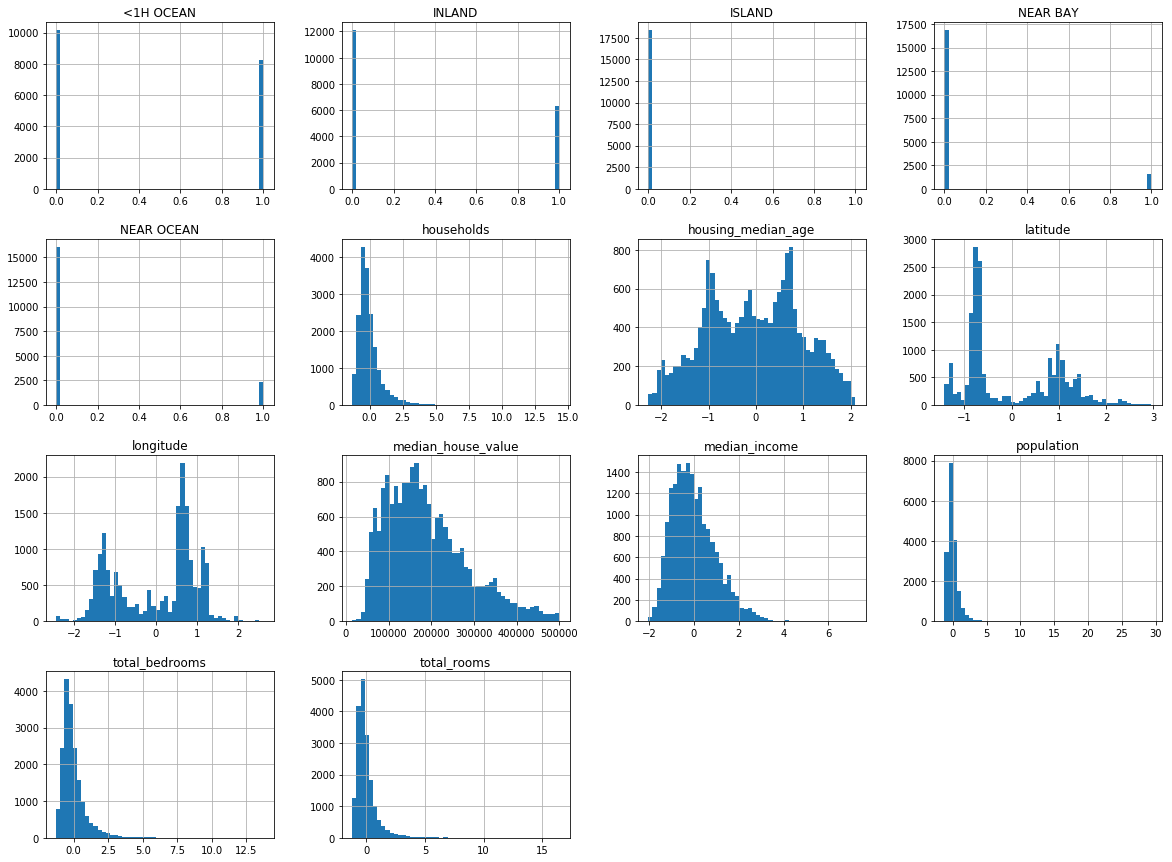

In [34]:
df_scaled.hist(bins=50,figsize=(20,15));

In [35]:
df_scaled['ISLAND'].value_counts()

0.0    18377
1.0        2
Name: ISLAND, dtype: int64

**Where did the other 3 islands go?**<br/>(And can we got there, too?)<br/>They were dropped because the housing_median_age was greater than 51.

## FINALLY.... let's split it up, yo!

In [36]:
df_scaled.shape

(18379, 14)

In [37]:
data_training, data_testing = train_test_split(df_scaled, test_size=0.20, random_state=11)

In [38]:
data_training.shape

(14703, 14)

In [39]:
data_testing.shape

(3676, 14)

In [40]:
data_training.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,median_house_value
4237,0.603311,-0.723356,1.839507,-0.590999,-0.139733,0.408228,-0.055484,-0.801333,0.0,1.0,0.0,0.0,0.0,123700.0
16086,-1.295047,0.822204,0.177611,-0.420423,-0.682325,-0.679557,-0.592014,2.446433,0.0,1.0,0.0,0.0,0.0,406800.0
3354,0.537677,-0.653526,0.527484,0.306768,0.563542,0.728721,0.683850,-0.914098,0.0,1.0,0.0,0.0,0.0,269700.0
116,-1.380877,1.022382,1.489634,-0.530849,-0.544931,-0.437254,-0.607417,-0.113465,1.0,0.0,0.0,0.0,0.0,109500.0
13630,1.279854,-1.295958,0.352547,-0.625114,-0.593834,-0.663232,-0.697267,-0.371487,0.0,1.0,0.0,0.0,0.0,147700.0


In [41]:
# Establish the labels/output
data_training_labels = data_training['median_house_value']

# Drop the output from our training data set for the model
data_training_no_labels = data_training.drop(['median_house_value'],axis=1)

# Establish the labels/output
data_testing_labels = data_testing['median_house_value']

# Drop the output from our training data set for the model
data_testing_no_labels = data_testing.drop(['median_house_value'],axis=1)


## Linear Regression - Multivariate## 
**<br/>Now that the data is split up, we can start to create a model.**

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(data_training_no_labels,data_training_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Try out the model with a bit of training data, quick & dirty, just to get a feel for it**

In [43]:
trial_data_no_labels = data_training_no_labels.iloc[:10]
trial_labels = data_training_labels.iloc[:10]


In [44]:
print ("Trial predictions: ",lin_reg.predict(trial_data_no_labels))

Trial predictions:  [162103.20351884 368975.85194284 160017.84245956 200341.99917279
 183038.90703211 131842.34094251 114652.49000093 141222.58849114
 252451.17482455 210152.82821989]


In [45]:
print ("Trial labels: ", trial_labels)

Trial labels:  4237     123700.0
16086    406800.0
3354     269700.0
116      109500.0
13630    147700.0
9023     137500.0
10864     71300.0
12990    137500.0
5546     297600.0
4421     140300.0
Name: median_house_value, dtype: float64


** Measure the regression model for the quick & dirty trial **

In [46]:
def error_tests (data_labels, predictions):
    print ('Mean Squared Error:'+ str(mean_squared_error(data_labels,predictions)))
    print('Root Mean Squared Error: ' + str(np.sqrt(mean_squared_error(data_labels,predictions))))
    print('R Squared: ' + str(r2_score(data_labels,predictions)))

In [47]:
trial_predictions = lin_reg.predict(trial_data_no_labels)
error_tests(trial_labels,trial_predictions)

Mean Squared Error:3327989424.8824673
Root Mean Squared Error: 57688.7287507921
R Squared: 0.6649513532703684


Whoa! That's crazy...crazy bad! Let's see if it's just as bad with the test data. 

**Using the test data**

In [48]:
lin_predictions = lin_reg.predict(data_testing_no_labels)
error_tests(data_testing_labels,lin_predictions)

Mean Squared Error:3630228558.524548
Root Mean Squared Error: 60251.37806328207
R Squared: 0.6138689180506343


Based on this test, our model would be off by $60,251 on average. Geez... that's not good.

In [49]:
lin_predictions

array([ 59730.47912152, 280648.85140177, 198054.85224642, ...,
        91738.31529784, 213505.90026424, 227115.17031852])

## Linear Regression with two variables##
** After the motto, "Location, location, location," let's try just using the latitude and longitude as predictors.**

In [50]:
# Drop the output from our training data set for the model
location_training_no_labels = data_training[['latitude', 'longitude']]

In [51]:
lin_reg_location = LinearRegression()
lin_reg_location.fit(location_training_no_labels,data_training_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
location_testing_no_labels = data_testing[['latitude','longitude']]
location_predictions = lin_reg_location.predict(location_testing_no_labels)

In [53]:
error_tests(data_testing_labels,location_predictions)

Mean Squared Error:6886497058.338288
Root Mean Squared Error: 82984.92066838582
R Squared: 0.2675142853655378


That's even worse. Let's try another model. And then look at feature engineering.

## K Neighbors Regression

In [54]:
neigh = KNeighborsRegressor(n_neighbors=9)
neigh.fit(data_training_no_labels,data_training_labels)
knr_predictions = neigh.predict(data_testing_no_labels)


In [55]:
error_tests(data_testing_labels,knr_predictions)

Mean Squared Error:2975749418.231979
Root Mean Squared Error: 54550.43004626067
R Squared: 0.6834829201665706


In [56]:
type(data_training_labels)

pandas.core.series.Series

In [57]:
data_testing_no_labels.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
17574,-1.865564,2.321211,-0.784539,-0.547008,-0.628765,-0.665809,-0.653626,-1.253476,0.0,0.0,1.0,0.0,0.0
13741,1.214219,-1.202852,-1.921626,1.341893,0.891892,0.940951,1.009876,1.593495,0.0,1.0,0.0,0.0,0.0
6042,0.704288,-0.746632,0.614952,-0.583817,-0.647395,-0.399448,-0.607417,-0.001082,0.0,1.0,0.0,0.0,0.0
3820,0.598263,-0.695424,-0.172262,0.563978,2.717612,2.917180,2.832540,-1.326742,0.0,1.0,0.0,0.0,0.0
8323,-2.067517,1.892923,-1.046944,-0.372842,-0.137404,-0.500837,-0.453389,-0.924291,0.0,1.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>


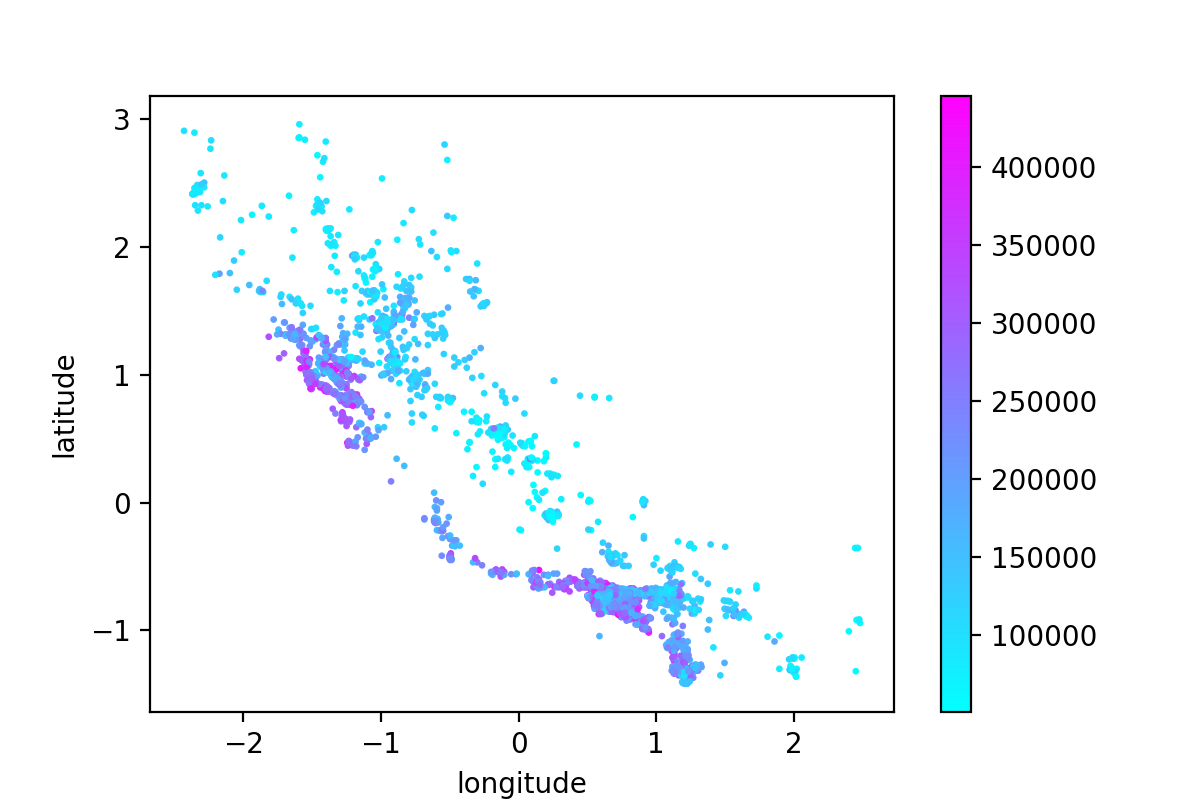

In [85]:
%matplotlib notebook

data_testing.plot(kind='scatter',x='longitude',y='latitude',c=knr_predictions,alpha=0.99,figsize=(6,4),s=2,cmap='cool');


<IPython.core.display.Javascript object>


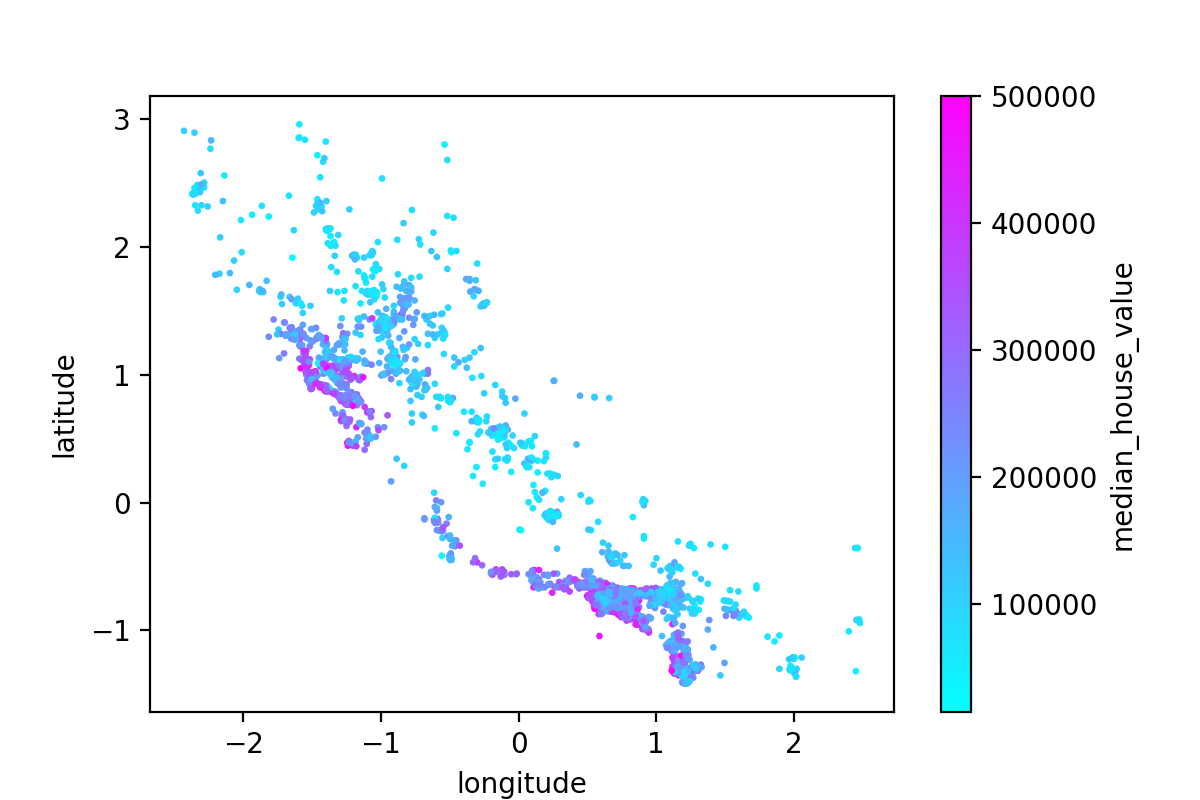

In [59]:
%matplotlib notebook

data_testing.plot(kind='scatter',x='longitude',y='latitude',c='median_house_value',alpha=0.99,figsize=(6,4),s=2,cmap='cool');


## Evaluate both models using cross-validation

In [60]:
scores = cross_val_score(neigh,data_training_no_labels,data_training_labels,scoring='neg_mean_squared_error',cv=10)
knr_rmse_scores = np.sqrt(-scores)

In [61]:
def show_scores (scores):
    print ("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [62]:
show_scores(knr_rmse_scores)

Scores: [53858.72050954 51934.37896833 49980.33679627 53877.72866642
 53887.91142875 53163.28706764 52000.32977362 54055.55035855
 56784.8778134  51006.65253018]
Mean: 53054.97739126966
Standard deviation: 1815.4560894552444


In [63]:
lin_scores = cross_val_score(lin_reg,data_training_no_labels,data_training_labels,scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)


In [64]:
show_scores(lin_rmse_scores)

Scores: [58645.72415813 56882.00459076 56186.49232938 58687.09739635
 58698.79817215 59468.58535959 57323.87464216 59237.28077053
 62293.30709034 58180.92164131]
Mean: 58560.40861506901
Standard deviation: 1593.2827002522097


Since the Multivariate Linear Regression has the lower standard deviation, let's stick with this model and try to fine-tune the model.

## Linear Regression with two variables
 latitude and median income

In [65]:
# Drop the output from our training data set for the model
loccash_training_no_labels = data_training[['latitude', 'median_income']]

In [66]:
lin_regr = LinearRegression()
lin_regr.fit(loccash_training_no_labels,data_training_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
loccash_testing_no_labels = data_testing[['latitude','median_income']]
loccash_predictions = lin_regr.predict(loccash_testing_no_labels)

In [68]:
error_tests(data_testing_labels,loccash_predictions)

Mean Squared Error:5306997472.4370985
Root Mean Squared Error: 72849.14187852248
R Squared: 0.43551855127062544


## KNR with the same two variables

In [101]:
neighb = KNeighborsRegressor(n_neighbors=9)
neighb.fit(loccash_training_no_labels,data_training_labels)
knr_predict = neighb.predict(loccash_testing_no_labels)



In [102]:
error_tests(data_testing_labels,knr_predict)

Mean Squared Error:4804825507.617931
Root Mean Squared Error: 69316.84865613794
R Squared: 0.48893232425330324


Maybe that wasn't the best idea.

## Feature Engineering

In [99]:
lin_reg.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [100]:
lin_reg.coef_

array([-45782.76296325, -45400.33541793,   7563.46374197, -15083.47306716,
        35470.66876044, -37689.68907929,  20882.99034432,  59956.38189966,
       -26607.77338571,  -9606.17690541, -49810.06159267,  -4455.48008108,
        90479.49196488])